In [1]:
import pandas as pd

pd.options.display.float_format = '{:20,.2f}'.format

RENT = 1100
EXPENDABLE_INCOME = 2000
TAXES_PCT = 1
INTEREST_RATE_PCT = 3
RESERVES_PCT = 1
PROPERTY_BUY_VALUE = 500000
CAPTIAL = 100000
BUY_VALUE = 500000
EXPECTED_STOCK_MARKET_RETURNS = 0.05
EXPECTED_HOUSING_MARKET_RETURNS = 0.03

def buy_by_year(year):
    #-CAPTIAL + 
    return year**2

def calc_rent_stock_returns(year, captial, exp_stock_returns, expendable_income, rent):
    return CAPTIAL * (1.05**year) # TODO plus monatliches investment von EXPENDABLE INCOME - RENT

def calc_rent_spent(year, rent):
    return rent*12*year*-1

def calc_table(max_year):
    rentAmounts = []
    rentSpentAmounts = []
    rentStockReturnsAmounts = []
    buyAmounts = []
    for year in range(0,max_year): #this is probaby slow. Can probably be faster directly in pandas
        rent_stock_return = calc_rent_stock_returns(year, CAPTIAL, EXPECTED_STOCK_MARKET_RETURNS, EXPENDABLE_INCOME, RENT)
        rent_spent = calc_rent_spent(year, RENT)
        rentSpentAmounts.append(rent_spent)
        rentStockReturnsAmounts.append(rent_stock_return)
        rentAmounts.append(rent_stock_return + rent_spent)
        buyAmounts.append(buy_by_year(year))

    return pd.DataFrame({'buy': buyAmounts,'rent': rentAmounts, 'rent_spent': rentSpentAmounts, 'rent_stock_returns': rentStockReturnsAmounts})
    
calc_table(30)

,buy,rent,rent_spent,rent_stock_returns
0,0,"100,000.00",0,"100,000.00"
1,1,"91,800.00",-13200,"105,000.00"
2,4,"83,850.00",-26400,"110,250.00"
3,9,"76,162.50",-39600,"115,762.50"
4,16,"68,750.63",-52800,"121,550.63"
5,25,"61,628.16",-66000,"127,628.16"
6,36,"54,809.56",-79200,"134,009.56"
7,49,"48,310.04",-92400,"140,710.04"
8,64,"42,145.54",-105600,"147,745.54"
9,81,"36,332.82",-118800,"155,132.82"


In [4]:
import matplotlib.pyplot as plt

from matplotlib.figure import Figure

def plot(max_year):
    df = calc_table(max_year)
    fig = plt.figure(figsize=(15, 15))
    ax = fig.add_subplot()
    plt.plot(df["rent"], label = "rent")
    plt.plot(df["rent_spent"],label = "rent_spent")
    plt.plot(df["rent_stock_returns"], label = "rent_stock_returns")
    plt.ticklabel_format(style='plain')
    return fig

Column
    [0] Column
        [0] IntSlider(end=60, name='max_year', value=30)
    [1] Row
        [0] Matplotlib(Figure, height=1080, name='interactive00113', width=1080)
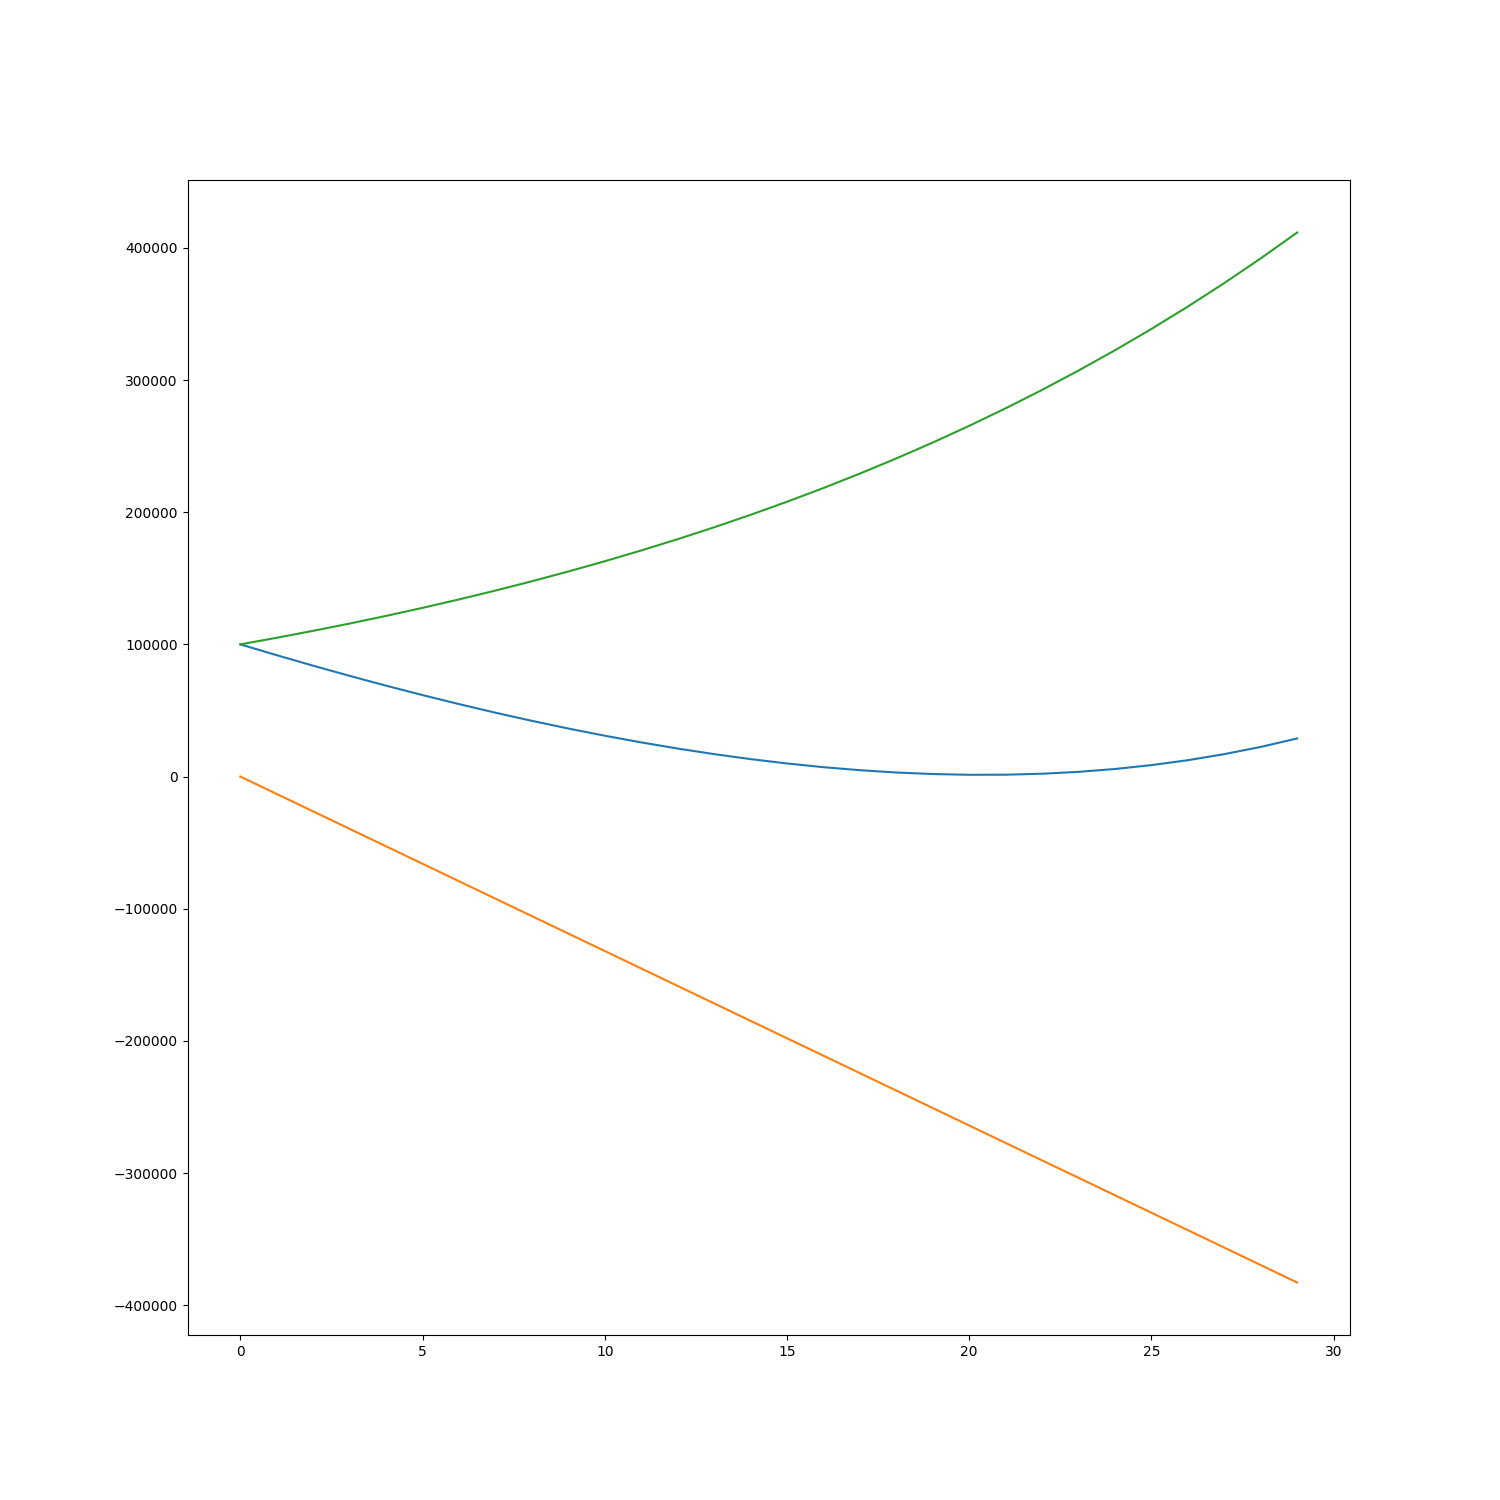

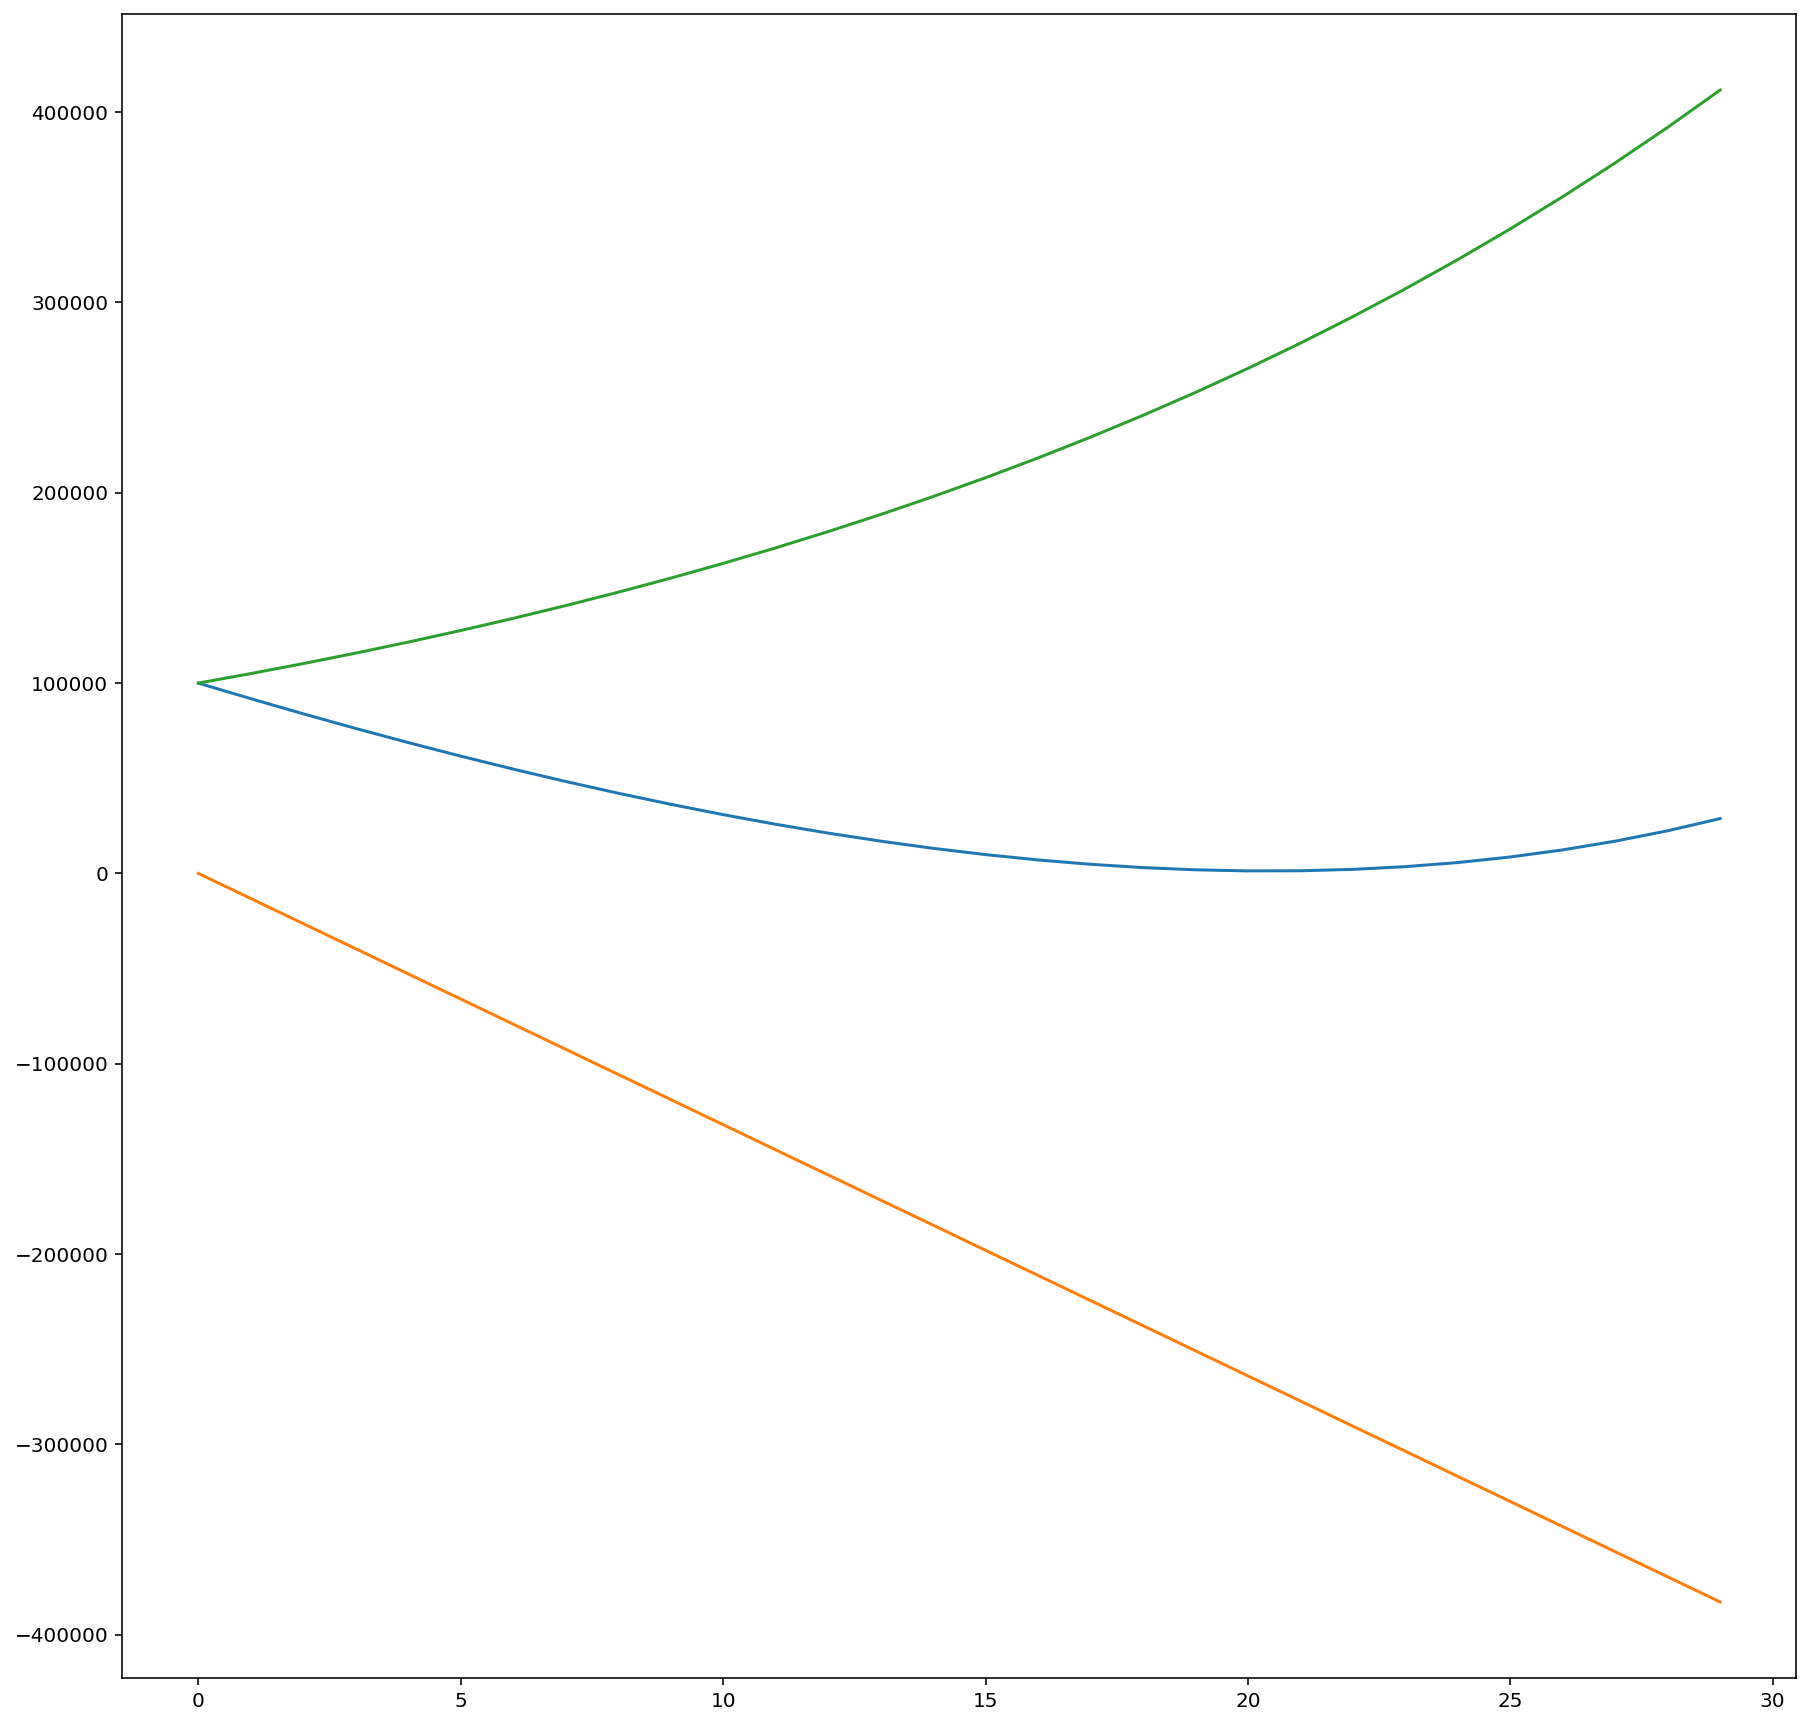

In [5]:
import panel as pn

from panel.interact import interact, interactive, fixed, interact_manual
from panel import widgets

pn.extension()


interact(plot, max_year=(0, 60, 1, 30))